# Importing all the Reaquired Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar


# Reading The Datafile


In [ ]:
df = pd.read_csv ("UDA.csv")
df['CATEGORY*'] = df['CATEGORY*'].replace({'Business': '1'})
df['CATEGORY*'] = df['CATEGORY*'].replace({'Personal': '2'})
df['CATEGORY*'] = df['CATEGORY*'].replace({'Business': '1'})
df['PURPOSE*'] = df['PURPOSE*'].str.replace('/','_')

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,1,Fort Pierce,Fort Pierce,5.1,Meal_Entertain
1,1/2/2016 1:25,1/2/2016 1:37,1,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,1,Fort Pierce,Fort Pierce,4.8,Errand_Supplies
3,1/5/2016 17:31,1/5/2016 17:45,1,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,1,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
df.dropna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,1,Fort Pierce,Fort Pierce,5.1,Meal_Entertain
2,1/2/2016 20:25,1/2/2016 20:38,1,Fort Pierce,Fort Pierce,4.8,Errand_Supplies
3,1/5/2016 17:31,1/5/2016 17:45,1,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,1,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,1,West Palm Beach,West Palm Beach,4.3,Meal_Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,1,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,1,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,1,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,1,Katunayake,Gampaha,6.4,Temporary Site


# TakingOut Unique values in Purpose Table

In [ ]:
df['PURPOSE*'].unique()

array(['Meal_Entertain', nan, 'Errand_Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport_Travel'], dtype=object)

# HeatMap

<Axes: >

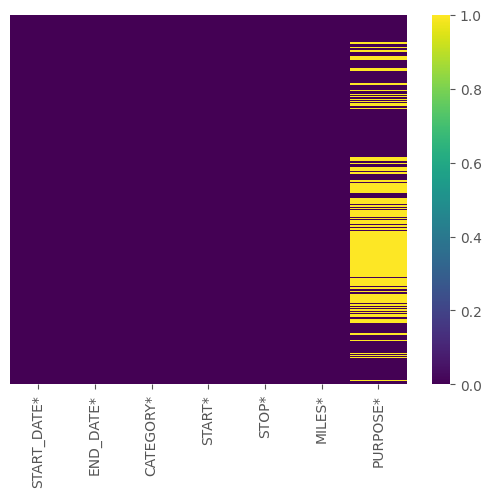

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cmap = "viridis")

<Axes: >

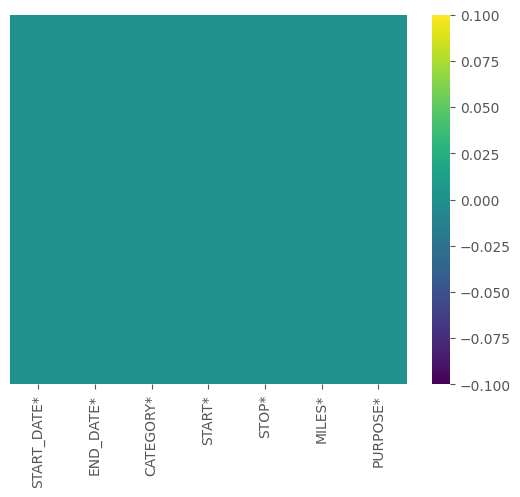

In [ ]:
df = df.dropna()
sns.heatmap(df.isnull(),yticklabels=False, cmap="viridis")

# Defining the format for StartDate and EndDate

In [ ]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format="%m/%d/%Y %H:%M" )
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format="%m/%d/%Y %H:%M")

In [ ]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR'] = hour
df['DAY'] = day
df['DAY_OF_WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,1,Fort Pierce,Fort Pierce,5.1,Meal_Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,1,Fort Pierce,Fort Pierce,4.8,Errand_Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,1,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,1,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,1,West Palm Beach,West Palm Beach,4.3,Meal_Entertain,17,6,2,1,Wednesday,0.066667,64.500000


# Calculation of Time

In [ ]:
time = []
df['TRAVELLING_TIME'] = df['END_DATE*'] - df['START_DATE*']
for i in df['TRAVELLING_TIME']:
    time.append(i.seconds/60)
df['TRAVELLING_TIME'] = time
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,1,Fort Pierce,Fort Pierce,5.1,Meal_Entertain,21,1,4,1,Friday,6.0,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,1,Fort Pierce,Fort Pierce,4.8,Errand_Supplies,20,2,5,1,Saturday,13.0,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,1,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,1,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,1,West Palm Beach,West Palm Beach,4.3,Meal_Entertain,17,6,2,1,Wednesday,4.0,64.500000


# Calculation of Travelling Time and Speed

In [ ]:
df['TRAVELLING_TIME'] = df['TRAVELLING_TIME']/60
df['SPEED'] = df['MILES*']/df['TRAVELLING_TIME']
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,1,Fort Pierce,Fort Pierce,5.1,Meal_Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,1,Fort Pierce,Fort Pierce,4.8,Errand_Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,1,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,1,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,1,West Palm Beach,West Palm Beach,4.3,Meal_Entertain,17,6,2,1,Wednesday,0.066667,64.500000


# CountPlot for Category Table

<Axes: ylabel='count'>

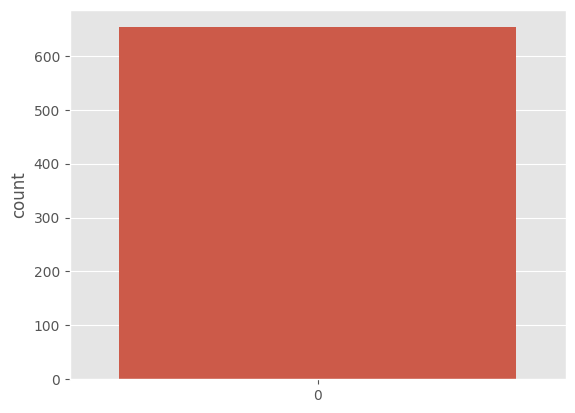

In [ ]:
sns.countplot(df['CATEGORY*'])

# Histogram for Miles Table

<Axes: ylabel='Frequency'>

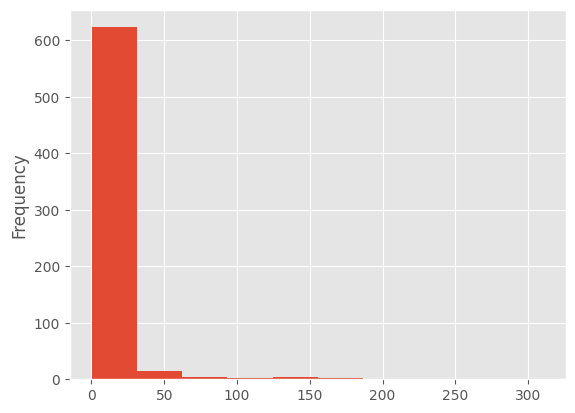

In [ ]:
df['MILES*'].plot.hist()

In [ ]:
df2=df.groupby(['PURPOSE*'])['PURPOSE*'].count()
df2

PURPOSE*
Airport_Travel       3
Between Offices     18
Charity ($)          1
Commute              1
Customer Visit     101
Errand_Supplies    128
Meal_Entertain     160
Meeting            187
Moving               4
Temporary Site      50
Name: PURPOSE*, dtype: int64

In [ ]:
df2 = list(df2)
df2

[3, 18, 1, 1, 101, 128, 160, 187, 4, 50]

In [ ]:
df3 = ['Airport_Travel','Between Offices','Charity ($)','Commute','Customer Visit','Errand_Supplies','Meal_Entertain',  'Meeting','Moving','Temporary Site',]
df3 = list(df3)
print(df3)

['Airport_Travel', 'Between Offices', 'Charity ($)', 'Commute', 'Customer Visit', 'Errand_Supplies', 'Meal_Entertain', 'Meeting', 'Moving', 'Temporary Site']


# Pie Chart For Purpose Table

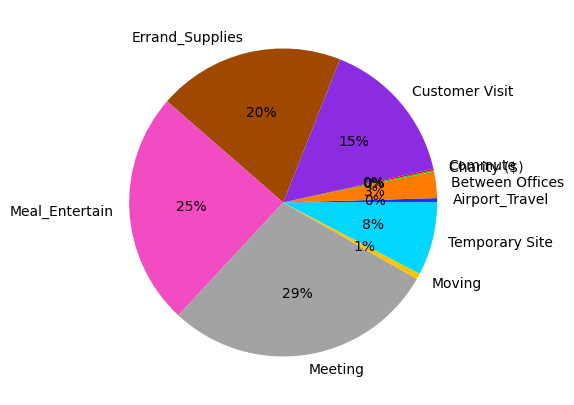

In [ ]:
plt.figure(figsize = (30,5))
colors= sns.color_palette('bright')
plt.pie(df2,labels=df3,colors=colors,autopct='%.0f%%',)
plt.show()

# Count Plot For Trips Per-Hour-of-the-Day

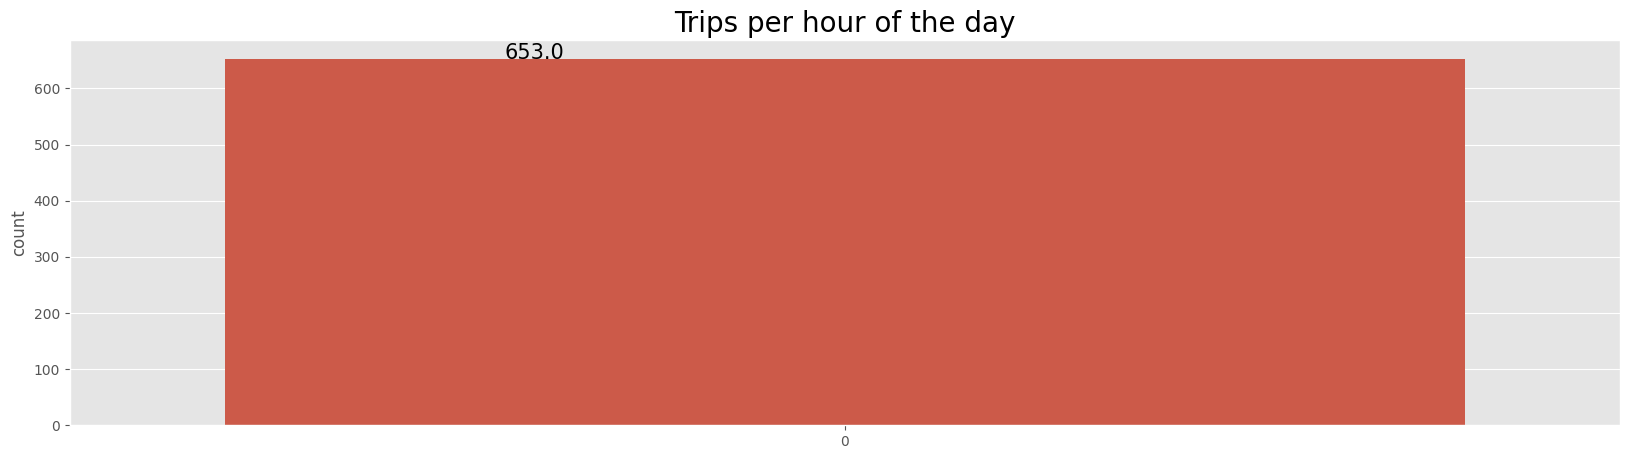

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(df['HOUR'])
ax.set_title("Trips per hour of the day", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

In [ ]:
df.WEEKDAY.unique()

array(['Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday'], dtype=object)

In [ ]:
df4=df.groupby(['WEEKDAY'])['WEEKDAY'].count()
df4

WEEKDAY
Friday       125
Monday        87
Saturday      83
Sunday        87
Thursday      92
Tuesday       94
Wednesday     85
Name: WEEKDAY, dtype: int64

In [ ]:
df4 = list(df4)
df4

[125, 87, 83, 87, 92, 94, 85]

In [ ]:
df5 = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
df5= list(df5)
print(df5)

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


# Pie Chart for Weekdays

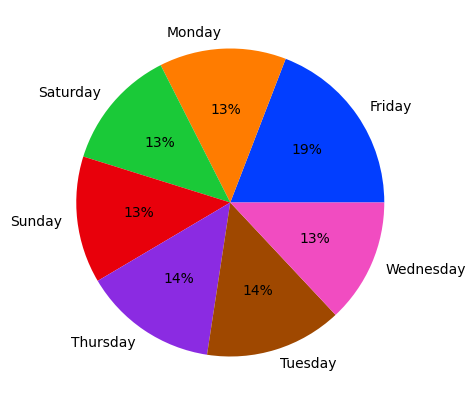

In [ ]:
plt.figure(figsize = (30,5))
colors= sns.color_palette('bright')
plt.pie(df4,labels=df5,colors=colors,autopct='%.0f%%',)
plt.show()

# BarGraph for Start Values

<Axes: >

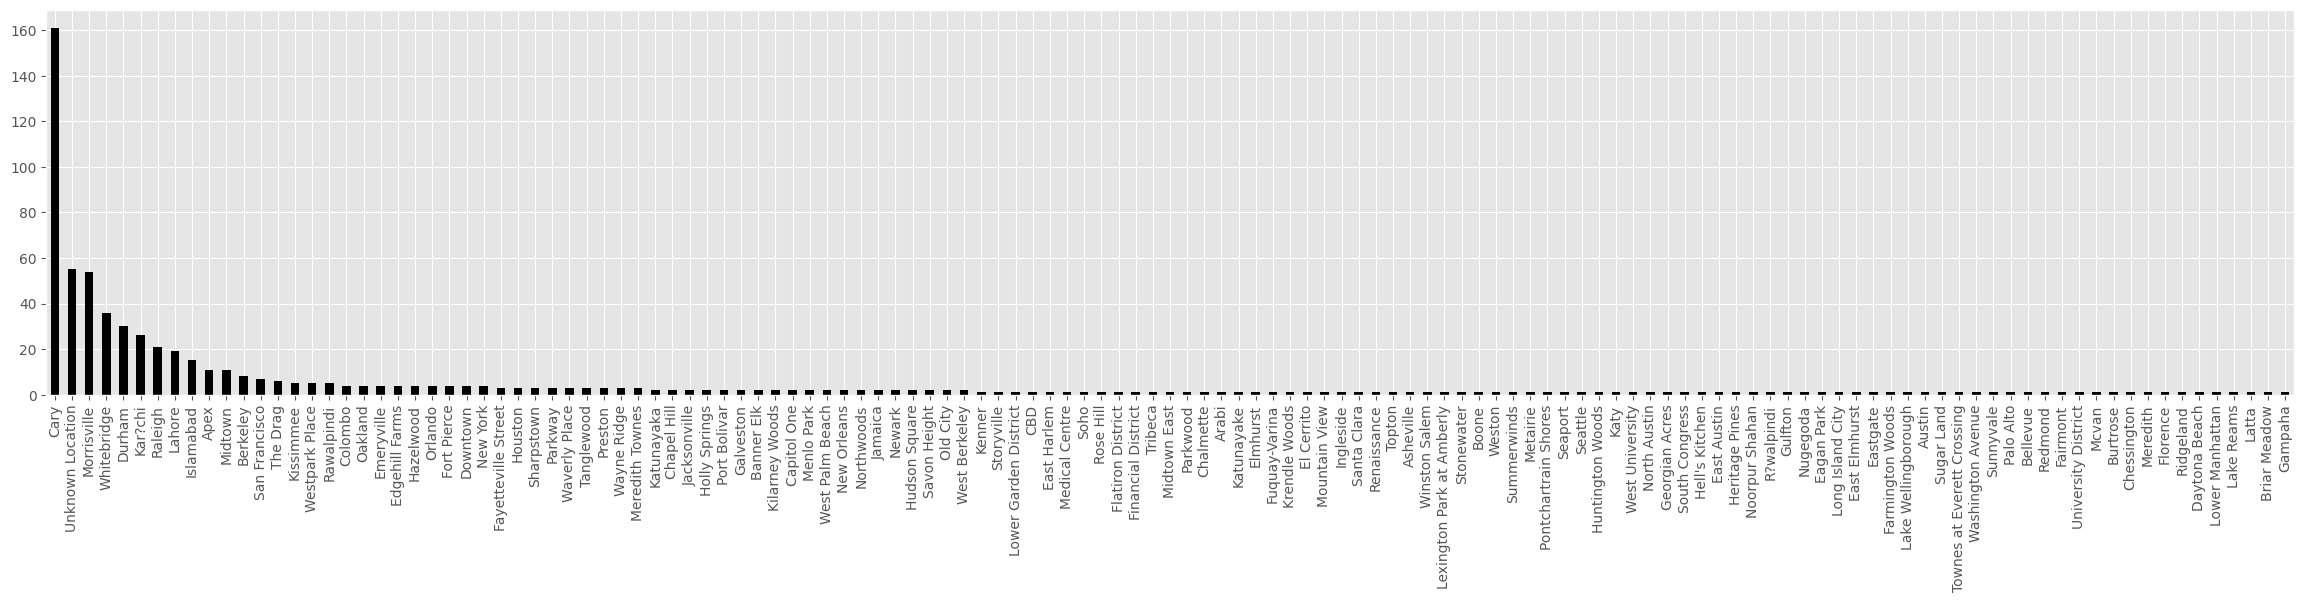

In [ ]:
df['START*'].value_counts().plot(kind = 'bar', figsize = (29,5), color = 'Black')

<ipython-input-91-a3c4dc01e1a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(10,5))


<Axes: xlabel='PURPOSE*'>

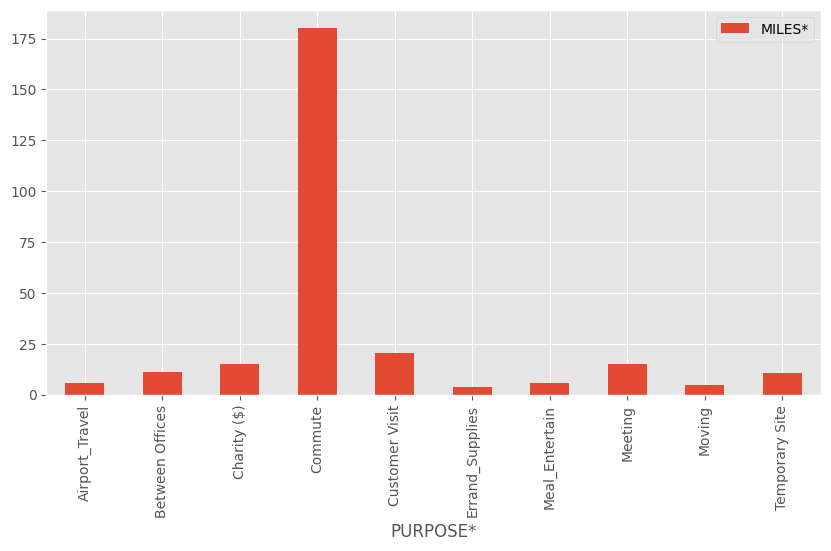

In [ ]:
df.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(10,5))